<a href="https://colab.research.google.com/github/Abisen10/-ALFA-AI-PROJECT-/blob/main/Data%20science%20capston%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                                  Data Overview
This dataset contains 1252 CT scans that are positive for SARS-CoV-2 infection (COVID-19) and 1230 CT scans for patients non-infected by SARS-CoV-2, 2482 CT scans in total. These data have been collected from real patients in hospitals from Sao Paulo, Brazil. The aim of this dataset is to encourage the research and development of artificial intelligent methods which are able to identify if a person is infected by SARS-CoV-2 through the analysis of his/her CT scans.


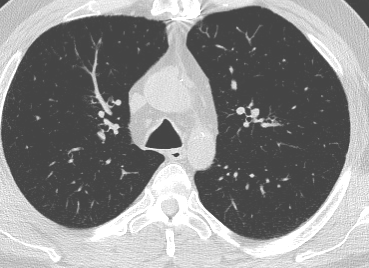

>




# UPLOAD DATA FROM GOOGLE DRIVE 

In [8]:
# IMPORT GOOOGLE DRIVE

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## The images are in different sizes so you have to take a fixed size on which you have to work Do data augmentation on it.


In [3]:
# IMPORTANT LIBRARIES
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import glob

In [ ]:
# Import libraries
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, BatchNormalization, GlobalAveragePooling2D, Input

In [5]:
'/drive/folders/1Yhue11-jj7hhAcGQiW0IU0mrwkbqQG4J?usp=share_link'

'/drive/folders/1Yhue11-jj7hhAcGQiW0IU0mrwkbqQG4J?usp=share_link'

In [6]:
df = pd.DataFrame({"File_path":['/drive/folders/1Yhue11-jjhhAcGQiW0IU0mrwkbqQG4J?usp=share_link'],
                   "Label":['COVID','NON-COVID']})

In [ ]:
# Three columns for the file path, class label, and class name.

disease_types = ['COVID', 'non-COVID']

train_directory = '/content/drive/MyDrive/Capstone_project/CT_Scan'

train_data_info = []
# This DataFrame will be used later for loading the CT scan images.
for class_index, class_name in enumerate(disease_types):
    for file_name in os.listdir(os.path.join(train_directory, class_name)):
        train_data_info.append([os.path.join(train_directory, class_name, file_name), class_index, class_name])

train_data = pd.DataFrame(train_data_info, columns = ['File Path', 'Class Label','Class Name'])


In [ ]:
# Set a seed for reproducibility
Seed = 40

# Shuffle the data using the seed and reset the indices
train = train_data.sample(frac = 1, replace=False, random_state = Seed)
train = train.reset_index(drop = True)

# Plot a frequency histogram to show the distribution of classes
sns.countplot(x = "Class Label", data = train)
for i in range(len(train['Class Label'].value_counts().values)):
    plt.text(x=i, y=train['Class Label'].value_counts().values[i]+5, s=train['Class Label'].value_counts().values[i], ha='center')
plt.title("Frequency Histogram (0: COVID, 1:Non-COVID)")


In [ ]:
# function to display the image of datasets.

def plot_defects(defect_types, rows, cols):
  
    fig, ax = plt.subplots(rows, cols, figsize=(12, 12))
    
    defect_files = train['File Path'][train['Class Name'] == defect_types].values

    n = 0
     
    fig.suptitle(defect_types, fontsize = 22, color = "Black")
    
    # Loop through the specified number of rows and columns
    for i in range(rows):
        for j in range(cols):
            # Get the image path for the current file name
            image_path = os.path.join(train_directory, defect_files[n])
            
            # Remove the x-axis and y-axis ticks
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            
            # Display the image in the current subplot
            
            ax[i, j].imshow(cv2.imread(image_path))
            
            # Increment the counter variable
            n += 1


# Call the function to display images of COVID cases
plot_defects('COVID', 5, 5)

# Call the function to display images of non-COVID cases
plot_defects('non-COVID', 5, 5)



In [ ]:
# Read an image and resize it using the OpenCV library.

IMAGE_SIZE = 224

# Function to load the image
def read_image(filepath):
    return cv2.imread(os.path.join(train_directory, filepath))

# Function to resize an image
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation = cv2.INTER_AREA)

In [ ]:
# the following code reshape the image and normalized the pixel
X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))

for i, file in enumerate(train['File Path'].values):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))

X_Train = X_train / 255.0   # Pixel normalization
print('Train Shape:', X_Train.shape)

Y_train = to_categorical(train['Class Label'].values, num_classes = 2)

print(Y_train)

In [ ]:
# Image Augmentation

datagen = ImageDataGenerator(rotation_range = 360, 
                        width_shift_range = 0.2,  
                        height_shift_range = 0.2,  
                        zoom_range = 0.2,          
                        horizontal_flip = True,
                        vertical_flip = True)       


                                                             SPLITTING DATA
The data can be split into train and test sets using the train_test_split() method from the scikit-learn library. This method takes two parameters: X, which is the feature set, and y, which is the target variable. The test size parameter is used to specify the proportion of the data that should be split into the test set. The random_state parameter is used to ensure that the same split is used each time the code is run.
 

In [ ]:
# Split the data set into training and testing

from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the training and testing sets
print('X_train = ', X_train)
print('X_test = ', X_test)
print('y_train = ', y_train)
print('y_test = ', y_test)

                                        Bulding and Visualizing the model using ResNet-50

 ResNet-Building50 is a convolutional neural network that is trained on more than a million images from the ImageNet database. It is a 50-layer deep convolutional network and is a variant of the ResNet architecture. ResNet-50 can be used for image classification, object detection, and other computer vision tasks.

In this example, ResNet-50 will be used to build and visualize a model for image classification. The code below imports the necessary libraries, loads the ResNet-50 model, and prepares the data for training.                                     

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.preprocessing.image import ImageDataGenerator

# First, we import the necessary libraries for our task
import numpy as np
from keras.applications import ResNet50
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

# Next, we initialize the ResNet50 model and add a flatten layer
model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg'))
model.add(Flatten())

# We then add a Dense layer with 2 neurons and Softmax activation
model.add(Dense(2, activation='softmax'))

# We set the model to not use the weights of the pre-trained model
model.layers[0].trainable = False

# We compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Finally, we define the ImageDataGenerator to feed the images to the model
train_data = ImageDataGenerator(rescale=1./255,



In [ ]:
def build_resnet50():
    resnet50 = ResNet50(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = resnet50(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # MULTI OUTPUT
    output = Dense(2,activation = 'softmax', name='root')(x)
 

    # MODEL
    model = Model(input,output)
    
    optimizer = Adam(lr=0.003, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model


In [ ]:
# MODEL
model = build_resnet50()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('ResNet50_Model.hdf5', verbose=1, save_best_only=True)
datagen = ImageDataGenerator(rotation_range=360, 
                        width_shift_range=0.2, 
                        height_shift_range=0.2,
                        zoom_range=0.2, 
                        horizontal_flip=True, 
                        vertical_flip=True) 

datagen.fit(X_train)

In [ ]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

In [ ]:
# ACCURNCY OF DATA
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
model.load_weights("ResNet50_Model.hdf5")
score = model.evaluate(X_val, Y_val ,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

In [ ]:
Y_pred = model.predict(X_val)
Y_predx = np.argmax(Y_pred, axis = -1)
Y_valx = np.argmax(Y_val, axis = -1)
cf_matrix = confusion_matrix(Y_valx, Y_predx)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '')
plt.title("Confusion Matrix")